# Clasificación de imágenes con Machine Learning

## Introducción

La capacidad de reconocer y clasificar caracteres manuscritos es un desafío fundamental en el campo del procesamiento de imágenes y el aprendizaje automático. Este proyecto se centra en el desarrollo de un modelo de clasificación de imágenes con técnicas de machine learning para identificar caracteres numéricos manuscritos. Los números manuscritos son una forma común de interacción humana en diversos contextos, como formularios, documentos oficiales y dispositivos electrónicos, lo que hace esencial la automatización del proceso de reconocimiento. A través de este proyecto, se busca construir un sistema que sea capaz de identificar de manera precisa y eficiente dígitos escritos a mano, superando las variaciones en estilo de escritura, tamaño y formato.

Para lograr este objetivo, utilizaremos un conjunto de datos de imágenes etiquetadas, que servirán para entrenar un modelo de aprendizaje supervisado. Este modelo aprenderá a reconocer patrones en las imágenes de los números manuscritos y, posteriormente, será capaz de clasificar nuevas imágenes en categorías correspondientes a los dígitos del 0 al 9. A lo largo del desarrollo del proyecto, se explorarán diferentes enfoques y algoritmos de machine learning, con el fin de encontrar el modelo más preciso y robusto para esta tarea.

El proyecto no solo tiene como objetivo alcanzar una alta precisión en la clasificación de números, sino también explorar cómo la tecnología de aprendizaje automático puede aplicarse para mejorar la automatización de tareas repetitivas en diversos ámbitos, como la digitalización de documentos y la interacción hombre-máquina en sistemas inteligentes.

### Conjunto de datos

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Análisis exploratorio de datos

En primera instancia, cargaremos y visualizaremos el conjunto de datos. Dado que se trata de un conjunto de datos visual, el objetivo principal será explorar las imágenes para entender su formato, tamaño y estructura. Visualizaremos algunas muestras representativas de las imágenes para identificar patrones, variaciones en la escritura y asegurar que los datos estén correctamente etiquetados. Este paso nos permitirá obtener una comprensión inicial del conjunto y preparar las imágenes para las siguientes fases del análisis y entrenamiento del modelo.

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [2]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [3]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [4]:
mnist.target[0]

'5'

Podemos ver que las imágenes vienen representadas como una matriz de números que representan los pixeles. Sin embargo, esto no resulta muy amigable para una persona y es difícil asociar esta matriz numérica con el número que representan. Para poder visualizarlos apropiadamente en formato gráfico nos serviremos de la biblioteca Matplotlib:

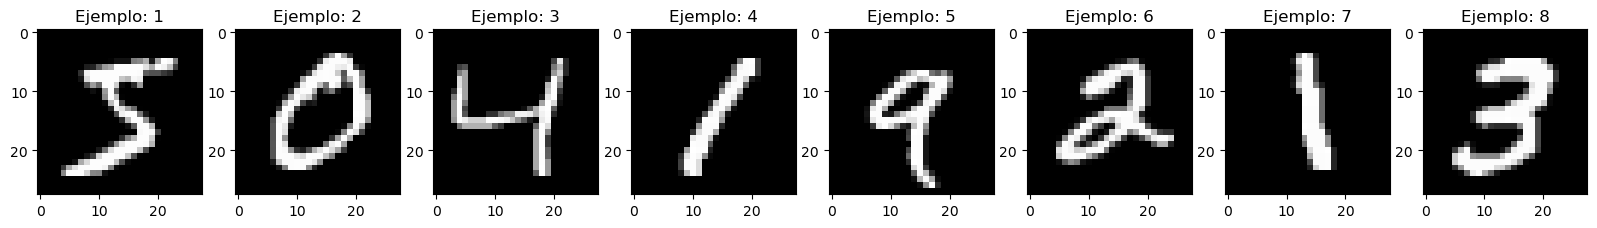

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(img, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: {}'.format(index))
plt.show()

In [6]:
mnist.target[:8]

array(['5', '0', '4', '1', '9', '2', '1', '3'], dtype=object)

In [7]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Entrenamiento del algoritmo

Primero, ahora que ya conocemos la estructura del conjunto de datos ya hemos coprobado que todo está correcto, vamos a dividir el conjunto de datos en dos subconjuntos:
- **Subconjunto de entrenamiento**:  Para entrenar nuestro algoritmo y que "aprenda" como son las imágenes y los números que aparecen en ellas escritos a mano.
- **subconjunto de pruebas**: Para evaluar qué tal se comporta nuestro algoritmo con imágenes que no ha visto nunca.

La división que realizaremos consistirá en asignar el 75% de las imágenes al subconjunto de entrenamiento y el 25% restante al subconjunto de prueba.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.25)

In [12]:
print(len(X_train))

52500


In [13]:
y_test[0]

'0'

Una vez dividido nuestro conjunto de datos, ya estamos listo para comenzar el entrenamiento del algoritmo. Para realizar la tarea de clasificación de las imágenes se ha escogido el **algoritmo Perceptrón** que es uno de los modelos fundamentales en el campo del aprendizaje supervisado. Se trata de un clasificador lineal que busca encontrar una frontera de decisión para separar los datos en diferentes clases. El Perceptrón se basa en una red neuronal de una sola capa, en la que cada entrada se multiplica por un peso, y el resultado se pasa a través de una función de activación (normalmente una función escalón) para obtener la predicción de la clase. Durante el proceso de entrenamiento, el algoritmo ajusta los pesos en función del error entre la salida predicha y la salida real, utilizando un enfoque iterativo conocido como *regla de aprendizaje del Perceptrón*. Aunque es un modelo simple, el Perceptrón es la base de redes neuronales más complejas y se utiliza principalmente en problemas lineales de clasificación.

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)

In [16]:
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

## Resultados y evaluación del modelo

Para evaluar el rendimiento del modelo de clasificación, utilizaremos el **F1-score**, una métrica que combina la precisión y el recall en un solo valor. El **F1-score** es particularmente útil en problemas de clasificación con clases desbalanceadas, como el reconocimiento de dígitos manuscritos, donde algunos números pueden estar representados con mayor frecuencia que otros en el conjunto de datos. Esta métrica se calcula como la media armónica entre la precisión y el recall, de modo que proporciona un equilibrio entre ambos, penalizando de manera más severa los modelos que tengan un desempeño bajo en cualquiera de estas dos métricas. Su valor varía entre 0 y 1, donde un F1-score de 1 indica un modelo perfecto y valores cercanos a 0 indican un desempeño deficiente.

La precisión mide la proporción de predicciones correctas en relación con todas las predicciones realizadas, mientras que el recall evalúa la capacidad del modelo para identificar todos los elementos relevantes dentro de cada clase. El F1-score es especialmente adecuado en este contexto porque nos permite obtener una evaluación más completa de la efectividad del modelo, minimizando tanto los falsos positivos como los falsos negativos.

In [17]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  21,  68,  48,  15,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 133, 224, 253, 253, 139,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 118, 231, 253, 253, 253, 234,
        31,  40,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   2,  95, 228, 243, 14

In [18]:
y_pred = clf.predict(X_test)

In [19]:
y_pred

array(['0', '3', '2', ..., '1', '4', '2'], dtype='<U1')

In [20]:
len(y_pred)

17500

In [21]:
len(y_test)

17500

In [22]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8458358154388631

El modelo ha obtenido un **F1-score de 0.845**, lo que indica un rendimiento bastante sólido en cuanto al equilibrio entre **precisión** y **recall**. Este valor refleja que el modelo es capaz de clasificar correctamente un buen porcentaje de las imágenes de números manuscritos, con un número relativamente bajo de falsos positivos y falsos negativos. Aunque no alcanza el valor máximo de 1 (que indicaría un modelo perfecto), el F1-score de 0.845 sugiere que el modelo tiene una buena capacidad para identificar correctamente los dígitos, con margen de mejora.

Este resultado indica que el modelo está funcionando de manera efectiva, pero también hay áreas donde podría perfeccionarse, como en la distinción de ciertos números manuscritos que pueden generar confusión. Posibles mejoras podrían incluir el ajuste de hiperparámetros, la incorporación de más datos de entrenamiento o el uso de técnicas más avanzadas para optimizar la clasificación.

Para finalizar, vamos a ver una muestra de algunas de las imágenes que han resultado mal clasificadas por parte del modelo:

In [23]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for etiqueta, predict in zip(y_test, y_pred):
    if etiqueta != predict:
        index_errors.append(index)
    index += 1

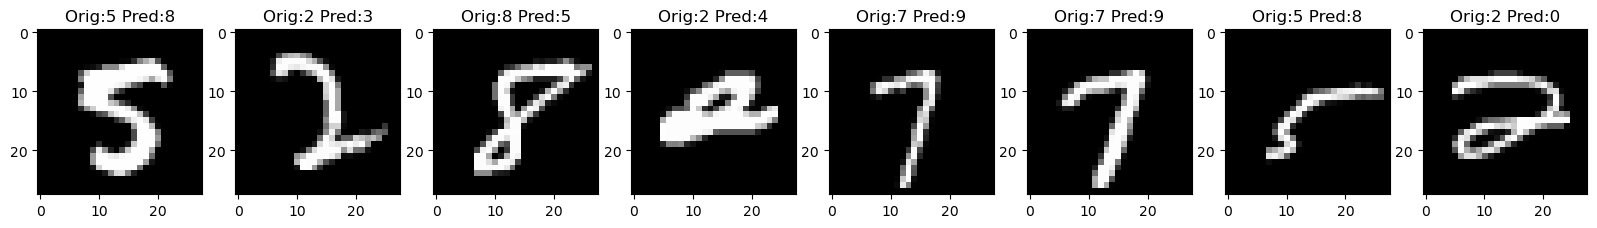

In [24]:
plt.figure(figsize=(20, 4))

for index, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()

Aunque dentro de esta pequeña muestra, vemos algunos números que son claramente legibles para un humano y que suponene un punto claro de mejora para el modelo, tenemos algunos caracteres mal clasificados que incluso examinados individualmente resultan confusos para una persona.

Podemos cocluir entonces que el modelo de clasificación, aunque puede optimizarse para obtener resultados más precisos, ha tenido un rendimiento satisfactorio en base al F1-score obtenido de 0.845 y a las observaciones finales de los datos mal clasificados. El modelo es capaz de identificar correctamente la mayor parte de dígitos escritos a mano con una cantidad razonable de errores.  